In [2]:
from Graph import AdjacencyMatrix
import numpy as np
from sklearn.neighbors import NearestNeighbors
import networkx as nx
import pandas as pd 

In [3]:
feature=np.load('/Users/yongyizhao/Downloads/feature_matrix.npy')
df=np.load('/Users/yongyizhao/Downloads/adjacent_matrix_full.npz')['m'] 


In [4]:
features = pd.DataFrame(feature, columns = ['is_reject','num_of_appli','is_new_client','overdue_day','num_of_devices','num_of_phones',
                                            'last_7d_avg_call_in_duration','last_7d_avg_call_out_duration','is_overdue'])

In [5]:
rej = features[features['is_reject'] == 1.0] 
rej_ind = np.array(rej.index)

In [6]:
rej_ind= rej_ind.astype(int) 

In [7]:
default = df[rej_ind]
default = np.array([default[i][rej_ind] for i in range(len(df[rej_ind]))]) 

In [8]:
over0= features[features['overdue_day'] == 0.0]
over0_ind = np.array(over0.index) 
over0 = df[over0_ind]
over0 = np.array([over0[i][over0_ind] for i in range(len(df[over0_ind]))]) 

In [8]:
over0 = over0.astype(int)

In [9]:
Object = AdjacencyMatrix(20000) 

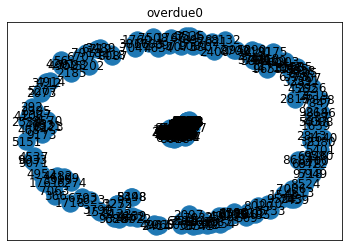

In [48]:
Object.plot_graph_1(over0, 'overdue0')

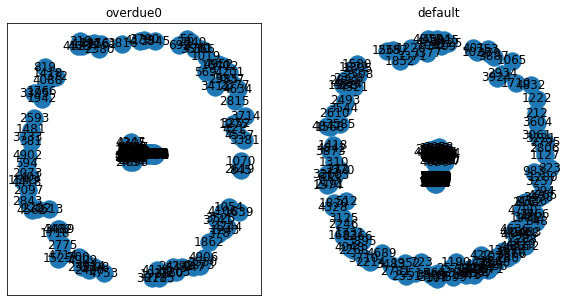

In [10]:
Object.plot_graph_2(over0, default, 'overdue0', 'default')

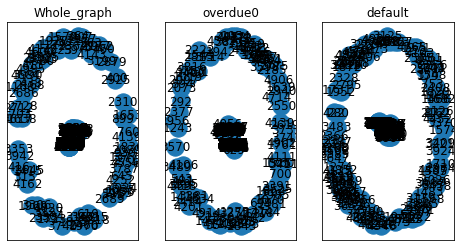

In [11]:
Object.plot_graph_3(df,over0, default, 'Whole_graph','overdue0', 'default')

In [9]:
import networkx as nx
import matplotlib.pyplot as plt
from copy import deepcopy

In [10]:
class Adj(object):

    def __init__(self, nodes):
        self.nodes = nodes  # number of nodes

    def graph(self, graph):

        graph_layout = nx.Graph()
        adjacent_matrix = deepcopy(graph)

        for n in range(1, self.nodes+1):
            graph_layout.add_node(n)

        for i in range(self.nodes):
            for j in range(self.nodes):

                if(adjacent_matrix[i][j] != 0):
                    graph_layout.add_edge(i+1, j+1)
                    adjacent_matrix[i][j] = 0
                    adjacent_matrix[j][i] = 0

        dictionary = nx.spring_layout(graph_layout)
        return graph_layout

In [11]:
overdue0 = Adj(8000)

In [12]:
G_0 = overdue0.graph(over0)

In [13]:
def connected_component_subgraphs(G):
    for c in nx.connected_components(G):
        yield G.subgraph(c)

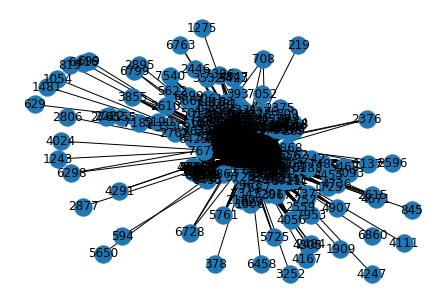

In [14]:
for i in connected_component_subgraphs(G_0):
    nx.draw(i,with_labels=True)

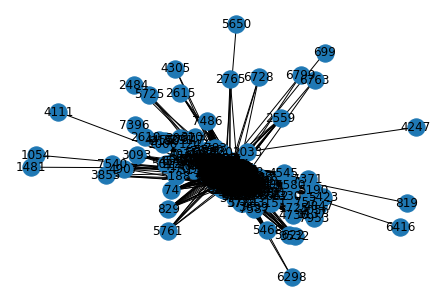

In [16]:
largest_size=5000
largest_graph = None
for i in connected_component_subgraphs(G_0):
    if len(i) > largest_size:
        largest_size = len(i)
        largest_graph = i
nx.draw(largest_graph,with_labels=True)

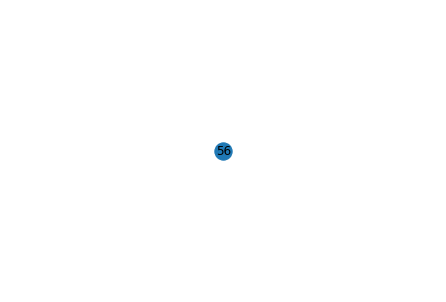

In [17]:
smallest_size=1000
smallest_graph = None
for g in connected_component_subgraphs(G_0):
    if len(g) < smallest_size:
        smallest_size = len(g)
        smallest_graph = g
nx.draw(smallest_graph,with_labels=True)

In [ ]:
nx.average_clustering(G_0)

In [ ]:
from networkx.algorithms.distance_measures import center
center(G_0)

In [ ]:
#a subgraph in which every node is connected to every other node
from networkx.algorithms.clique import find_cliques, cliques_containing_node
list(find_cliques(G_0))

In [ ]:
G_d = overdue0.graph(rej)

In [ ]:
largest_size=5000
largest_graph = None
for i in connected_component_subgraphs(G_d):
    if len(i) > largest_size:
        largest_size = len(i)
        largest_graph = i
nx.draw(largest_graph,with_labels=True)

In [ ]:
smallest_size=1000
smallest_graph = None
for g in connected_component_subgraphs(G_d):
    if len(g) < smallest_size:
        smallest_size = len(g)
        smallest_graph = g
nx.draw(smallest_graph,with_labels=True)

In [ ]:
nx.average_clustering(G_d)

In [ ]:
from networkx.algorithms.distance_measures import center
center(G_d)

In [ ]:
#a subgraph in which every node is connected to every other node
from networkx.algorithms.clique import find_cliques, cliques_containing_node
list(find_cliques(G_d))